In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

file_path = "MORTGAGE30US.csv"
file_path2 = "CORESTICKM159SFRBATL.csv"
file_path3 ="UNRATE.csv"
file_path4="TXUR.csv"
file_path5="AMERIBOR.csv"
file_cal_unem="CAUR.csv"
file_mi_un ="MIUR.csv"
file_interest="DFF.csv"
file_nj_un="NJUR.csv"
nj_un_df = pd.read_csv(file_nj_un)
interest_df = pd.read_csv(file_interest)
mi_un_df = pd.read_csv(file_mi_un)
cal_un_df = pd.read_csv(file_cal_unem)
df = pd.read_csv(file_path)
inflation = pd.read_csv(file_path2)
unemployment = pd.read_csv(file_path3)
unemployment
inflate = pd.read_csv(file_path5)
tx_unemploy = pd.read_csv(file_path4)
merged=pd.merge(unemployment,tx_unemploy,on="DATE",how="inner")
merged=pd.merge(merged,cal_un_df,on="DATE",how="inner")
merged=pd.merge(merged,mi_un_df,on="DATE",how="inner")
merged=pd.merge(merged,nj_un_df,on="DATE",how="inner")
merged=pd.merge(merged,inflation,on="DATE",how="inner")
merged=merged.rename(columns={"CORESTICKM159SFRBATL":"Nationwide Inflation Rate"})
merged=pd.merge(merged,interest_df,on="DATE",how="inner")
# merge = pd.merge(unemployment,inflation,on="DATE",how="outer")
# merge = pd.merge(merge,df,on="DATE",how="outer")

# merge = pd.merge(merge,inflate,on="DATE",how="outer")

merged

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR,Nationwide Inflation Rate,DFF
0,1980-02-01,6.3,4.9,6.3,10.4,6.6,13.627778,13.44
1,1980-03-01,6.3,5.1,6.5,11.2,6.7,14.361386,16.33
2,1980-04-01,6.9,5.3,6.7,12.0,6.9,14.786780,19.79
3,1980-05-01,7.5,5.4,6.9,12.7,7.1,15.147256,14.07
4,1980-06-01,7.6,5.4,7.1,13.2,7.3,15.810582,11.06
...,...,...,...,...,...,...,...,...
522,2023-08-01,3.8,4.1,4.6,3.7,4.2,5.217343,5.33
523,2023-09-01,3.8,4.1,4.7,3.9,4.4,5.008782,5.33
524,2023-10-01,3.8,4.1,4.8,4.1,4.6,4.931956,5.33
525,2023-11-01,3.7,4.1,4.9,4.3,4.7,4.730629,5.33


In [8]:
path_median_cpi = "MEDCPIM158SFRBCLE.csv"
median_cpi_df = pd.read_csv(path_median_cpi)
median_cpi_df= median_cpi_df.rename(columns={'MEDCPIM158SFRBCLE':"MEDIAN CPI"})
median_cpi_df

,DATE,MEDIAN CPI
0,1983-01-01,5.014653
1,1983-02-01,4.952545
2,1983-03-01,3.612261
3,1983-04-01,4.828054
4,1983-05-01,3.767326
...,...,...
487,2023-08-01,4.027318
488,2023-09-01,5.626580
489,2023-10-01,3.881948
490,2023-11-01,5.340107


In [9]:
merged = pd.merge(merged,median_cpi_df,on="DATE",how="inner")
merged = merged.rename(columns={"DFF":"Federal Funds Rate"})
merged

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR,Nationwide Inflation Rate,Federal Funds Rate,MEDIAN CPI
0,1983-01-01,10.4,8.4,11.1,16.5,9.1,4.695598,11.20,5.014653
1,1983-02-01,10.4,8.5,11.0,16.3,9.0,4.627836,8.63,4.952545
2,1983-03-01,10.3,8.5,10.8,15.9,8.9,4.855813,8.65,3.612261
3,1983-04-01,10.2,8.5,10.5,15.5,8.7,4.456934,9.12,4.828054
4,1983-05-01,10.1,8.4,10.3,15.2,8.6,3.549624,8.84,3.767326
...,...,...,...,...,...,...,...,...,...
487,2023-08-01,3.8,4.1,4.6,3.7,4.2,5.217343,5.33,4.027318
488,2023-09-01,3.8,4.1,4.7,3.9,4.4,5.008782,5.33,5.626580
489,2023-10-01,3.8,4.1,4.8,4.1,4.6,4.931956,5.33,3.881948
490,2023-11-01,3.7,4.1,4.9,4.3,4.7,4.730629,5.33,5.340107


In [10]:
filtered_df = merged[(merged['DATE'] >= '2017-01-01')]
filtered_df

,DATE,UNRATE,TXUR,CAUR,MIUR,NJUR,Nationwide Inflation Rate,Federal Funds Rate,MEDIAN CPI
408,2017-01-01,4.7,4.8,5.2,4.8,4.6,2.661562,0.55,3.436306
409,2017-02-01,4.6,4.7,5.1,4.7,4.5,2.674460,0.66,3.292346
410,2017-03-01,4.4,4.6,5.0,4.5,4.5,2.453344,0.66,1.914384
411,2017-04-01,4.4,4.5,5.0,4.3,4.4,2.252170,0.82,1.553658
412,2017-05-01,4.4,4.4,4.9,4.3,4.5,2.155911,0.91,2.113219
...,...,...,...,...,...,...,...,...,...
487,2023-08-01,3.8,4.1,4.6,3.7,4.2,5.217343,5.33,4.027318
488,2023-09-01,3.8,4.1,4.7,3.9,4.4,5.008782,5.33,5.626580
489,2023-10-01,3.8,4.1,4.8,4.1,4.6,4.931956,5.33,3.881948
490,2023-11-01,3.7,4.1,4.9,4.3,4.7,4.730629,5.33,5.340107


Text(0.5, 0, 'DATE')

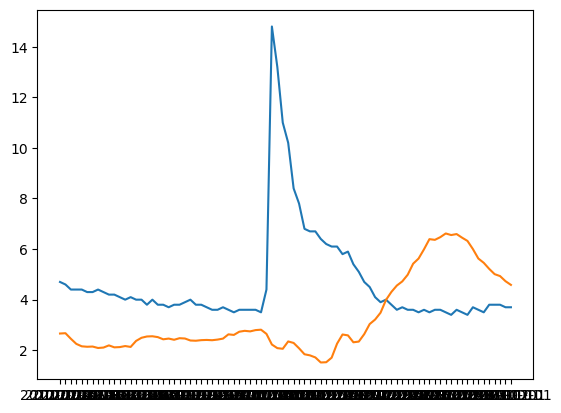

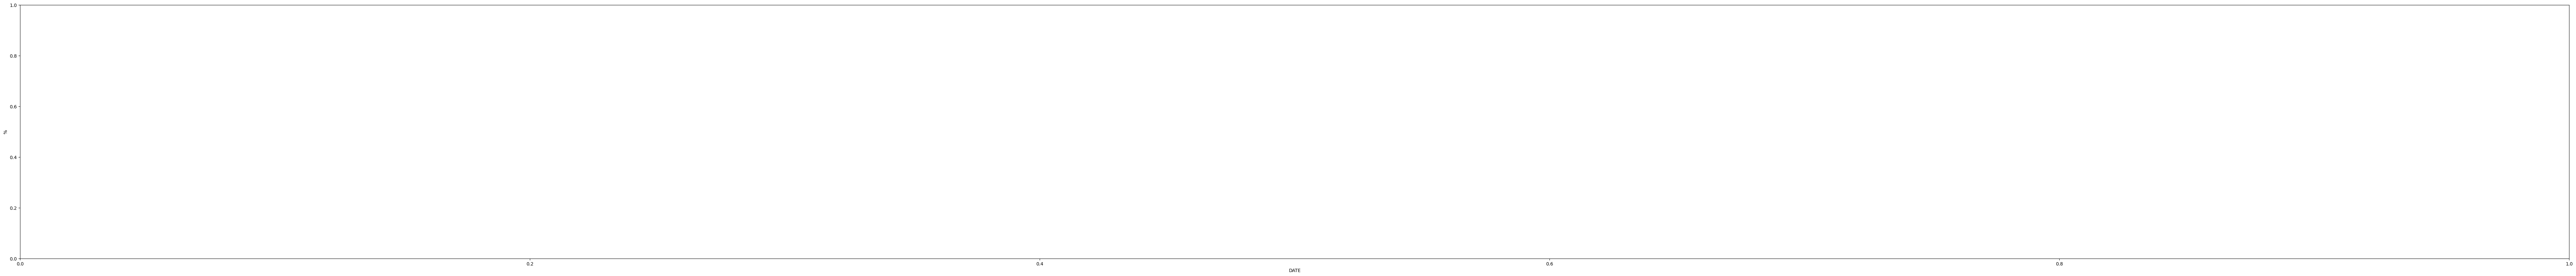

In [11]:



plt.plot(filtered_df['DATE'], filtered_df['UNRATE'], label='UNRATE')
plt.plot(filtered_df['DATE'], filtered_df['Nationwide Inflation Rate'], label='Nationwide Inflation Rate')
plt.figure(figsize=(100,10))
plt.ylabel("%")
plt.xlabel('DATE')
#starting at 2017 ending 2023, need to tinker with the xlabels so you can see dates

In [13]:
z_scores = stats.zscore(filtered_df['UNRATE'])

# Define a threshold for identifying outliers (e.g., z_score_threshold = 3)
z_score_threshold = 3

# Identify the indices of the outliers
outlier_indices = abs(z_scores) > z_score_threshold

# Remove outliers from the DataFrame
df_no_outliers = filtered_df[~outlier_indices]

# Display the DataFrame without outliers
print(df_no_outliers)

TypeError: 'Series' object cannot be interpreted as an integer